In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [37]:
data = fetch_california_housing()

In [39]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [41]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [43]:
X = df[data.feature_names]
y = df['Target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
k = 5  
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [51]:
y_pred = knn_regressor.predict(X_test_scaled)

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.4324216146043236
R² Score: 0.6700101862970989


In [55]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

        Actual  Predicted
20046  0.47700   0.498800
3024   0.45800   0.764600
15663  5.00001   4.750006
20484  2.18600   2.876600
9814   2.78000   2.726200


In [57]:
# Initialize variables to store MSE and R2 scores for different values of k
mse_list = []
r2_list = []
k_values = range(1, 21)  # Testing k values from 1 to 20

In [59]:
# Loop through different k values
for k in k_values:
    # Initialize and train the KNN regressor for each k
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = knn_regressor.predict(X_test_scaled)
    
    # Calculate and store MSE and R² scores
    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

In [61]:
# Plotting MSE for different k values
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

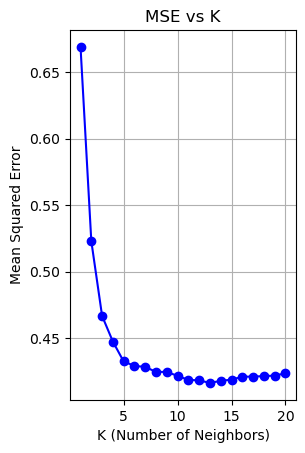

In [63]:
# MSE plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(k_values, mse_list, color='blue', marker='o', label='MSE')
plt.title('MSE vs K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error')
plt.grid(True)

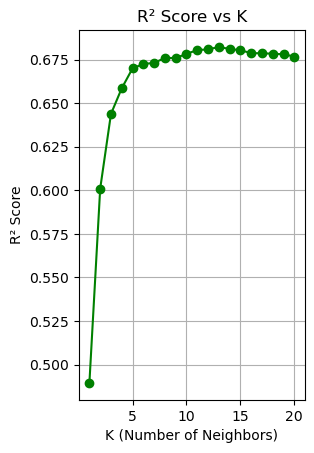

In [65]:
# R² score plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(k_values, r2_list, color='green', marker='o', label='R² Score')
plt.title('R² Score vs K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('R² Score')
plt.grid(True)

In [69]:
# Show plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>